PARTE 2

In [25]:
# Suponga que tenemos una empresa, cuya área de marketing, desea generar una clusterización
# para poder tener mayor éxito con sus campañas. Para esto nos entregó una base de
# datos (llamada evaluación_mkt_campaign.csv) que contiene los siguientes campos:

# 1. ID: Identificador único de cliente
# 2. Age: Edad del cliente
# 3. Seniority: Días desde el enrolamiento del cliente
# 4. Children: Número hijos
# 5. Ingreso: Ingreso anual del cliente
# 6. Recency: Días desde la ́ultima compra del cliente
# 7. MntWines: Gasto en vino en los últimos 2 años
# 8. MntFruits: Gasto en fruta en los últimos 2 años
# 9. MntMeatProducts: Gasto en carne en los últimos 2 años
# 10. MntFishProducts: Gasto en pescado en los últimos 2 años
# 11. MntSweetProducts: Gasto en dulces en los últimos 2 años
# 12. MntGoldProds: Gasto en oro en los últimos 2 años
# 13. NumDealsPurchases: Número de compras realizada bajo descuento
# 14. NumWebPurchases: Número de compras realizadas por la web
# 15. NumCatalogPurchases: Número de compras realizadas por catálogo
# 16. NumStorePurchases: Número de compras realizadas en la tienda
# 17. NumWebVisitsMonth: Número de visitas a la página web


In [26]:
# En base a estos datos, realice lo siguiente:
# Búsqueda de Anomalías: Usando las columnas de comportamiento de compra, encuentre
# registros anómalos correspondientes al 5% de la muestra, y descártelos.
# Feature Extraction: Usando los datos filtrados reduzca el número de variables. Busque una
# representación que le permita explicar un 90% de la varianza original de los datos.


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
df = pd.read_csv('evaluacion_mkt_campaign.csv', sep=',')
df

,ID,Income,Recency,MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Seniority,Children
0,5524,58138.0,58,635,546,172,88,88,3,8,10,4,7,58,997,0
1,2174,46344.0,38,11,6,2,1,6,2,1,1,2,5,61,151,2
2,4141,71613.0,26,426,127,111,21,42,1,8,2,10,4,50,498,0
3,6182,26646.0,26,11,20,10,3,5,2,2,0,4,6,31,91,1
4,5324,58293.0,94,173,118,46,27,15,5,5,3,6,5,34,347,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,61223.0,46,709,182,42,118,247,2,9,3,4,5,48,567,1
2212,4001,64014.0,56,406,30,0,0,8,7,8,2,5,7,69,87,3
2213,7270,56981.0,91,908,217,32,12,24,1,2,3,13,6,34,341,0
2214,8235,69245.0,8,428,214,80,30,61,2,6,5,10,3,59,342,1


In [29]:
# Setear ID como indice
df.set_index('ID', inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 5524 to 9405
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2216 non-null   float64
 1   Recency              2216 non-null   int64  
 2   MntWines             2216 non-null   int64  
 3   MntMeatProducts      2216 non-null   int64  
 4   MntFishProducts      2216 non-null   int64  
 5   MntSweetProducts     2216 non-null   int64  
 6   MntGoldProds         2216 non-null   int64  
 7   NumDealsPurchases    2216 non-null   int64  
 8   NumWebPurchases      2216 non-null   int64  
 9   NumCatalogPurchases  2216 non-null   int64  
 10  NumStorePurchases    2216 non-null   int64  
 11  NumWebVisitsMonth    2216 non-null   int64  
 12  Age                  2216 non-null   int64  
 13  Seniority            2216 non-null   int64  
 14  Children             2216 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 2

In [31]:
df.describe()

,Income,Recency,MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Seniority,Children
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,49.012635,305.091606,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,46.179603,538.006318,0.947202
std,25173.076661,28.948352,337.327920,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,11.985554,232.469034,0.749062
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,26.000000,0.000000
25%,35303.000000,24.000000,24.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,38.000000,366.000000,0.000000
50%,51381.500000,49.000000,174.500000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,45.000000,539.000000,1.000000
75%,68522.000000,74.000000,505.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,56.000000,712.000000,1.000000
max,666666.000000,99.000000,1493.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,122.000000,1089.000000,3.000000


In [32]:
columnas_compras = ['NumDealsPurchases','NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases']
df[columnas_compras].describe()

,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumCatalogPurchases
count,2216.000000,2216.000000,2216.000000,2216.000000
mean,2.323556,5.800993,4.085289,2.671029
std,1.923716,3.250785,2.740951,2.926734
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,2.000000,0.000000
50%,2.000000,5.000000,4.000000,2.000000
75%,3.000000,8.000000,6.000000,4.000000
max,15.000000,13.000000,27.000000,28.000000


In [33]:
# sumar las columans de compras
df['TotalPurchases'] = df[columnas_compras].sum(axis=1)
df['TotalPurchases'].describe()

count    2216.000000
mean       14.880866
std         7.670957
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: TotalPurchases, dtype: float64

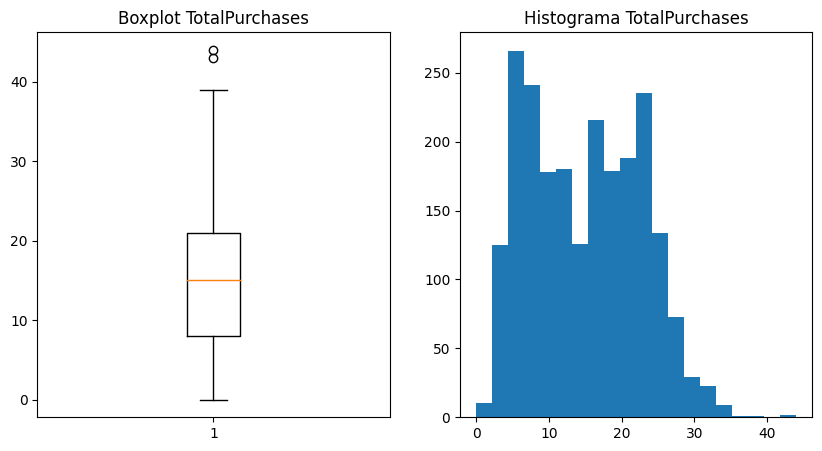

In [34]:
# graficar boxplot de TotalPurchases y histograma
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].boxplot(df['TotalPurchases'])
axs[0].set_title('Boxplot TotalPurchases')
axs[1].hist(df['TotalPurchases'], bins=20)
axs[1].set_title('Histograma TotalPurchases')
plt.show()

In [35]:
#filtrar el 5% de datos anomalos de TotalPurchases
q = df['TotalPurchases'].quantile(0.95)
df_filtrado = df[df['TotalPurchases'] < q]
df_filtrado

,Income,Recency,MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Seniority,Children,TotalPurchases
ID,,,,,,,,,,,,,,,,
5524,58138.0,58,635,546,172,88,88,3,8,10,4,7,58,997,0,25
2174,46344.0,38,11,6,2,1,6,2,1,1,2,5,61,151,2,6
4141,71613.0,26,426,127,111,21,42,1,8,2,10,4,50,498,0,21
6182,26646.0,26,11,20,10,3,5,2,2,0,4,6,31,91,1,8
5324,58293.0,94,173,118,46,27,15,5,5,3,6,5,34,347,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,61223.0,46,709,182,42,118,247,2,9,3,4,5,48,567,1,18
4001,64014.0,56,406,30,0,0,8,7,8,2,5,7,69,87,3,22
7270,56981.0,91,908,217,32,12,24,1,2,3,13,6,34,341,0,19


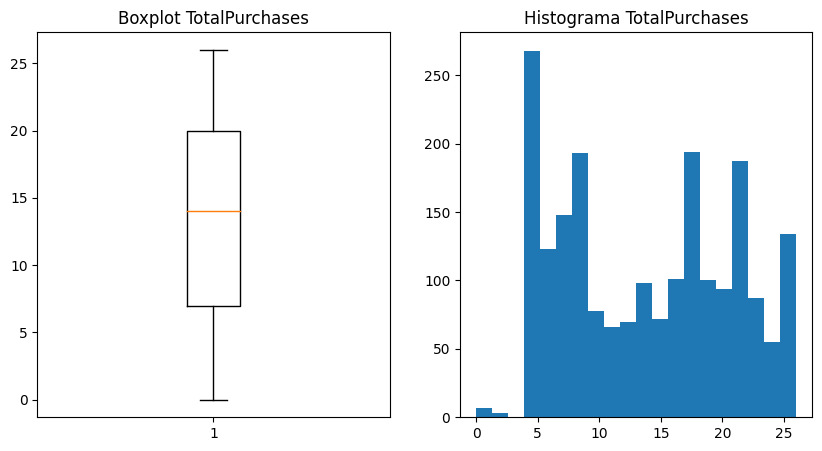

In [36]:
# graficar boxplot de TotalPurchases y histograma
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].boxplot(df_filtrado['TotalPurchases'])
axs[0].set_title('Boxplot TotalPurchases')
axs[1].hist(df_filtrado['TotalPurchases'], bins=20)
axs[1].set_title('Histograma TotalPurchases')
plt.show()

In [37]:
# genear X con drop de TotalPurchases, Income
X = df_filtrado.drop(['TotalPurchases', 'Income'], axis=1)
y = df_filtrado['Income']

In [38]:
from sklearn.decomposition import PCA

In [39]:
# estandarizar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.30433126,  1.08431224,  1.8112294 , ...,  0.99423037,
         2.0079743 , -1.26483491],
       [-0.38587377, -0.82908047, -0.70132677, ...,  1.24412079,
        -1.64207039,  1.38870062],
       [-0.79999679,  0.44344833, -0.13832807, ...,  0.32785591,
        -0.14494804, -1.26483491],
       ...,
       [ 1.44316957,  1.92142155,  0.28043129, ..., -1.004893  ,
        -0.8223204 , -1.26483491],
       [-1.42118133,  0.449581  ,  0.26647264, ...,  1.07752718,
        -0.81800593,  0.06193286],
       [-0.31685327, -0.60523806, -0.44541827, ...,  1.24412079,
         1.19253878,  1.38870062]])

In [40]:
pca = PCA(n_components=0.9)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

n_components = X_pca.shape[1]

In [41]:
print(f'Number of components: {n_components}')
print(f'Explained variance: {pca.explained_variance_ratio_.sum()}')

Number of components: 10
Explained variance: 0.9177784955020832


In [42]:
# Clustering:
# a) Usando los resultados anteriores clusterice el comportamiento de sus clientes. El área de
# marketing solicitó que el número de clusters sea no mayor a 8. Encuentre el número óptimo de
# clusters considerando esa restricción
# b) Reporte los centroides de cada cluster en términos de las variables originales. Interprete.


In [43]:
# import k-means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

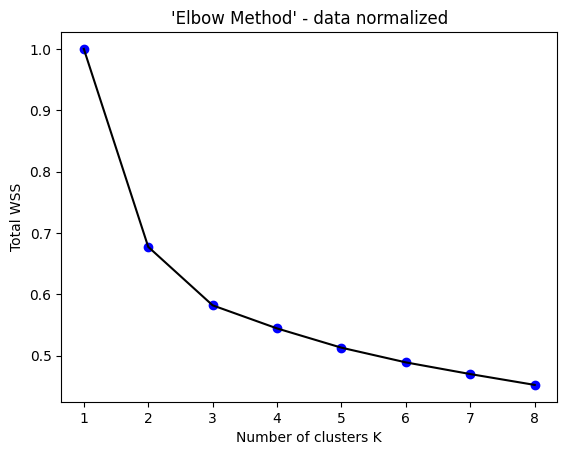

In [44]:
k_max = 8  # Número máximo de clusters a probar
wss = np.zeros(k_max)

for k in range(1, k_max + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_pca)
    wss[k-1] = kmeans.inertia_
wss/=wss.max() # Normalizamos los valores de WSS

plt.figure()
plt.plot(range(1, k_max + 1), wss, color='black')
plt.scatter(range(1, k_max + 1), wss, color='blue')
plt.title("'Elbow Method' - data normalized")
plt.xlabel("Number of clusters K")
plt.ylabel("Total WSS")
plt.show()

In [45]:
# range of cluster numbers to try
k_max = 8
min_clusters = 2
max_clusters = 8

# Sum of Squared Errors and silhouette scores
sse = np.zeros(k_max)
silhouette_scores = np.zeros(k_max)

for k in range(min_clusters, max_clusters + 1):

    print(f'Clustering with {k} clusters...')

    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10,
    )
    
    kmeans.fit(X_pca)
    
    # Calculate SSE (Sum of Squared Errors)
    sse[k-1] = kmeans.inertia_
    
    # Calculate Silhouette score
    labels = kmeans.labels_
    score = silhouette_score(X_pca, labels)
    silhouette_scores[k-1] = score

Clustering with 2 clusters...
Clustering with 3 clusters...
Clustering with 4 clusters...
Clustering with 5 clusters...
Clustering with 6 clusters...
Clustering with 7 clusters...
Clustering with 8 clusters...


In [46]:
silhouette_scores.shape , sse.shape , wss.shape

((8,), (8,), (8,))

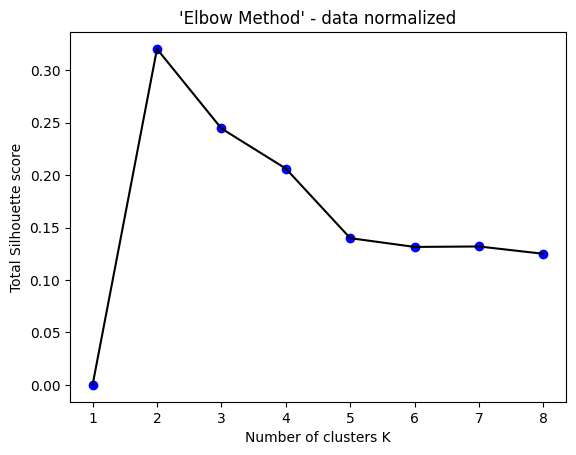

In [47]:
plt.figure()
plt.plot(range(1, max_clusters + 1), silhouette_scores, color='black')
plt.scatter(range(1, max_clusters + 1), silhouette_scores, color='blue')
plt.title("'Elbow Method' - data normalized")
plt.xlabel("Number of clusters K")
plt.ylabel("Total Silhouette score")
plt.show()

In [48]:
# Tanto utilizando SSE y Silhouette Score, se evidencia que el
#  número de clusters a considerar es 3



In [49]:
#Crear instancia de kmeans
k=3
kmeans = KMeans(
    n_clusters=k,
    n_init='auto',
    random_state=42
)

#Entrenar modelo
kmeans.fit(X_pca)

# Obtener centroides
centroides_pca = kmeans.cluster_centers_

In [50]:
#Aplicar transformación inversa a pca
centroids_original = pca.inverse_transform(centroides_pca)
print(centroids_original)

[[ 1.20458712e-02  3.93780793e-01 -1.45607692e-01 -1.77609078e-01
  -1.75423291e-01  3.20706807e-01  9.50783866e-01  8.81367218e-01
   3.17148029e-02  5.07649985e-01  3.92216427e-01  2.74208226e-01
   3.24068965e-01  3.72857412e-01]
 [-6.50226509e-03 -7.58660003e-01 -6.39710635e-01 -5.53122677e-01
  -5.08331918e-01 -5.51673462e-01 -2.01381547e-01 -7.29378920e-01
  -7.08882431e-01 -7.63643239e-01  3.81266199e-01 -1.98519356e-01
  -1.66425476e-01  3.40244092e-01]
 [-3.14992493e-04  9.80513472e-01  1.30706214e+00  1.18214016e+00
   1.09867673e+00  6.78446844e-01 -5.90652919e-01  4.37112363e-01
   1.25426280e+00  8.75057600e-01 -1.08612523e+00  8.44608547e-02
  -2.39040060e-02 -9.92231476e-01]]


In [51]:
#Obtener los máximos
cluster = ["Cluster_1", "Cluster_2", "Cluster_3"]
variables = X.columns.to_list()
df_centroides = pd.DataFrame(dict(zip(cluster, centroids_original)), index=variables).abs()

max_index = df_centroides.idxmax()
max_value = df_centroides.max()

max_df = pd.DataFrame({'Variable': max_index, 'Centroide': max_value})

print("Valores Máximos Absolutos Centroides: ")
print()
print(max_df)


Valores Máximos Absolutos Centroides: 

                    Variable  Centroide
Cluster_1  NumDealsPurchases   0.950784
Cluster_2  NumStorePurchases   0.763643
Cluster_3    MntMeatProducts   1.307062


In [52]:
# Obtener las etiquetas de los clusters asignados a cada punto
labels = kmeans.labels_

# Calcular la desviación estándar de cada variable dentro de cada cluster
std_dev = []
for i in range(k):
    cluster_points = X[labels == i]  # Puntos en el cluster i
    cluster_std = np.std(cluster_points, axis=0)  # Desviación estándar de las variables en el cluster i
    std_dev.append(cluster_std)

# Crear un dataframe con las variables y su desviación estándar dentro de cada cluster
std_dev_df = pd.DataFrame(std_dev, columns=X.columns)
std_dev_df.index.name = 'Cluster'

max_index = std_dev_df.T.idxmax()
max_value = std_dev_df.T.max()

max_df = pd.DataFrame({'Variable': max_index, 'sd': max_value})

print("Variables con mayor desviación estándar para cada cluster: ")
print()
print(max_df)

Variables con mayor desviación estándar para cada cluster: 

          Variable          sd
Cluster                       
0         MntWines  281.703322
1        Seniority  226.978162
2         MntWines  315.321131


In [53]:
# Al considerar los valores absolutos de los centroides, 
# podemos ver que para el Cluster1 la variable más importante es 
# *NumDealsPurchases*, para el Cluster2 *NumStorePurchases* y 
# para el cluster3 *MntMeatProducts*. Sin embargo, como estos 
# representan distancias, puede que no sea el método más adecuado 
# para ello. Por eso que considerando la desviación estándar de 
# cada cluster, tienen mayor relavancia para el Cluster1 y Cluster3 
# *MntWines* y para el Cluster2 *Seniority*
